# Initialization

In [57]:
#%pip install matplotlib numpy pandas scikit-learn seaborn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.base import BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFECV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import LinearSVC, SVC

In [3]:
data = pd.read_csv("mldata_0003244705/mldata_0003244705.csv", index_col = 0)
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

---
# Exploratory data analysis

## Overview

In [4]:
data.shape

(1300, 27)

In [5]:
data.head()

label  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      2   0.995465   0.178960   1.150166  -4.539162  -1.541832   0.883026   
1      0   0.843136   4.729887   0.234779  -0.267685   1.932253  -2.119993   
2      0  -0.025736   0.613286  -0.432285   5.022219  -1.103289   2.011531   
3      1  -0.449428   4.579088   1.150951   1.225932   2.508840   0.152220   
4      1   0.472216  -4.310393  -0.255534   2.601015   4.586109   1.709812   

   feature_7  feature_8  feature_9  ...  feature_17  feature_18  feature_19  \
0   0.467187  -0.521326  -0.389304  ...    0.407119    0.919872   -1.372244   
1  -0.112564   0.808618   0.529138  ...   -3.073183    0.956349    1.958720   
2  -0.222457   1.601136   0.468876  ...   -4.499683    0.923241   -0.725749   
3   0.840045   0.409591   1.329561  ...   -0.579774   -0.992102    1.004893   
4  -0.651709   1.755416  -0.727260  ...   -3.871306   -0.032193    1.965276   

   feature_20  feature_21  feature_22  feature_23  feature_24  feature_25  \
0    0.122445   -3.357443   -3.970041   -1.132589   -0.071423   -1.729217   
1   -1.889510    0.540192    0.841964   -2.841965   -0.009369   -1.229266   
2   -0.969029    5.449728    0.426853   -2.064622   -2.422070    0.048179   
3   -0.072360    1.101481   -0.308366   -3.640109   -1.247184    0.966470   
4    0.993257   -0.190764   -1.349351   -3.088215   -1.952342   -0.059712   

   categorical_feature_1  
0                      B  
1                      C  
2                      C  
3                      A  
4                      B  

[5 rows x 27 columns]

In [6]:
data.dtypes

label                      int64
feature_1                float64
feature_2                float64
feature_3                float64
feature_4                float64
feature_5                float64
feature_6                float64
feature_7                float64
feature_8                float64
feature_9                float64
feature_10               float64
feature_11               float64
feature_12               float64
feature_13               float64
feature_14               float64
feature_15               float64
feature_16               float64
feature_17               float64
feature_18               float64
feature_19               float64
feature_20               float64
feature_21               float64
feature_22               float64
feature_23               float64
feature_24               float64
feature_25               float64
categorical_feature_1     object
dtype: object

In [7]:
label_counts = np.unique(y, return_counts = True)
pd.DataFrame(label_counts[1], index = label_counts[0], columns = ["Total"])

Total
0    420
1    439
2    441

In [8]:
X.describe(include = "float64")

feature_1    feature_2    feature_3    feature_4    feature_5  \
count  1300.000000  1300.000000  1300.000000  1300.000000  1300.000000   
mean      0.092828     1.239790     0.266796     0.414389     0.413962   
std       0.699561     2.703396     1.497461     2.228133     3.528696   
min      -2.459282    -7.301353    -4.432402    -8.944786   -11.062169   
25%      -0.389735    -0.440697    -0.773717    -1.091797    -1.969615   
50%       0.096467     1.352849     0.193129     0.427549     0.266842   
75%       0.564966     3.135200     1.274726     1.888182     2.838467   
max       2.671038    10.220627     5.155167     7.575226    12.732505   

         feature_6    feature_7    feature_8    feature_9   feature_10  ...  \
count  1300.000000  1300.000000  1300.000000  1300.000000  1300.000000  ...   
mean     -0.230303     0.046550     0.165780    -0.021940     0.654473  ...   
std       3.218404     0.441662     1.662933     1.471645     3.154155  ...   
min      -9.764392    -1.401564    -4.994007    -4.800220   -11.992254  ...   
25%      -2.404301    -0.246739    -0.895248    -1.058451    -1.396370  ...   
50%      -0.205594     0.058675     0.118456    -0.027109     0.807682  ...   
75%       1.880529     0.339144     1.244586     0.989585     2.813340  ...   
max      10.354661     1.862838     7.292894     4.834564    10.925736  ...   

        feature_16   feature_17   feature_18   feature_19   feature_20  \
count  1300.000000  1300.000000  1300.000000  1300.000000  1300.000000   
mean      0.123576    -0.462910     0.078366     0.255217     0.112255   
std       0.956231     4.148487     0.931708     2.000566     1.235700   
min      -3.166831   -17.954084    -3.151716    -6.762418    -4.137962   
25%      -0.518668    -3.130190    -0.558958    -1.156260    -0.752840   
50%       0.133511    -0.329837     0.102132     0.250762     0.163050   
75%       0.762478     2.290263     0.728155     1.682144     0.922930   
max       3.416681    12.652532     2.951983     5.746757     3.998220   

        feature_21   feature_22   feature_23   feature_24   feature_25  
count  1300.000000  1300.000000  1300.000000  1300.000000  1300.000000  
mean      0.258525     0.138461    -0.611438    -0.028157     0.135662  
std       2.987043     1.362336     1.909391     1.641111     1.122158  
min     -10.572669    -4.966408    -9.337277    -6.290502    -3.299094  
25%      -1.589297    -0.786485    -1.941985    -1.028506    -0.610271  
50%       0.298330     0.192085    -0.648049    -0.055068     0.112454  
75%       2.189536     1.069406     0.648224     0.953907     0.909869  
max      10.484754     4.247185     5.418037     5.996904     4.052700  

[8 rows x 25 columns]

The distribution of categories is skewed much more towards `A`.

In [9]:
data.groupby("categorical_feature_1").size()

categorical_feature_1
A    692
B    246
C    362
dtype: int64

The labels are quite evenly balanced.

In [10]:
np.unique(y, return_counts = True)

(array([0, 1, 2]), array([420, 439, 441]))

## Duplicates and missing values

The data set has no duplicate rows or columns and no missing values.

In [11]:
print("# of duplicate rows:", data[data.duplicated()].shape[0])

coluumn_counter = 0
for i in range(data.shape[1]):
    for j in range(i + 1, data.shape[1]):
        if data.iloc[:, i].equals(data.iloc[:, j]):
            print(f"Columns {i} and {j} are identical.")
            coluumn_counter += 1
            
print("# of duplicate columns:", coluumn_counter)

# of duplicate rows: 0
# of duplicate columns: 0


In [12]:
print("# of missing values:", data.isna().sum().sum())

# of missing values: 0


## Distribution

### Histogram

Histograms give a visual representation of the data's distribution.

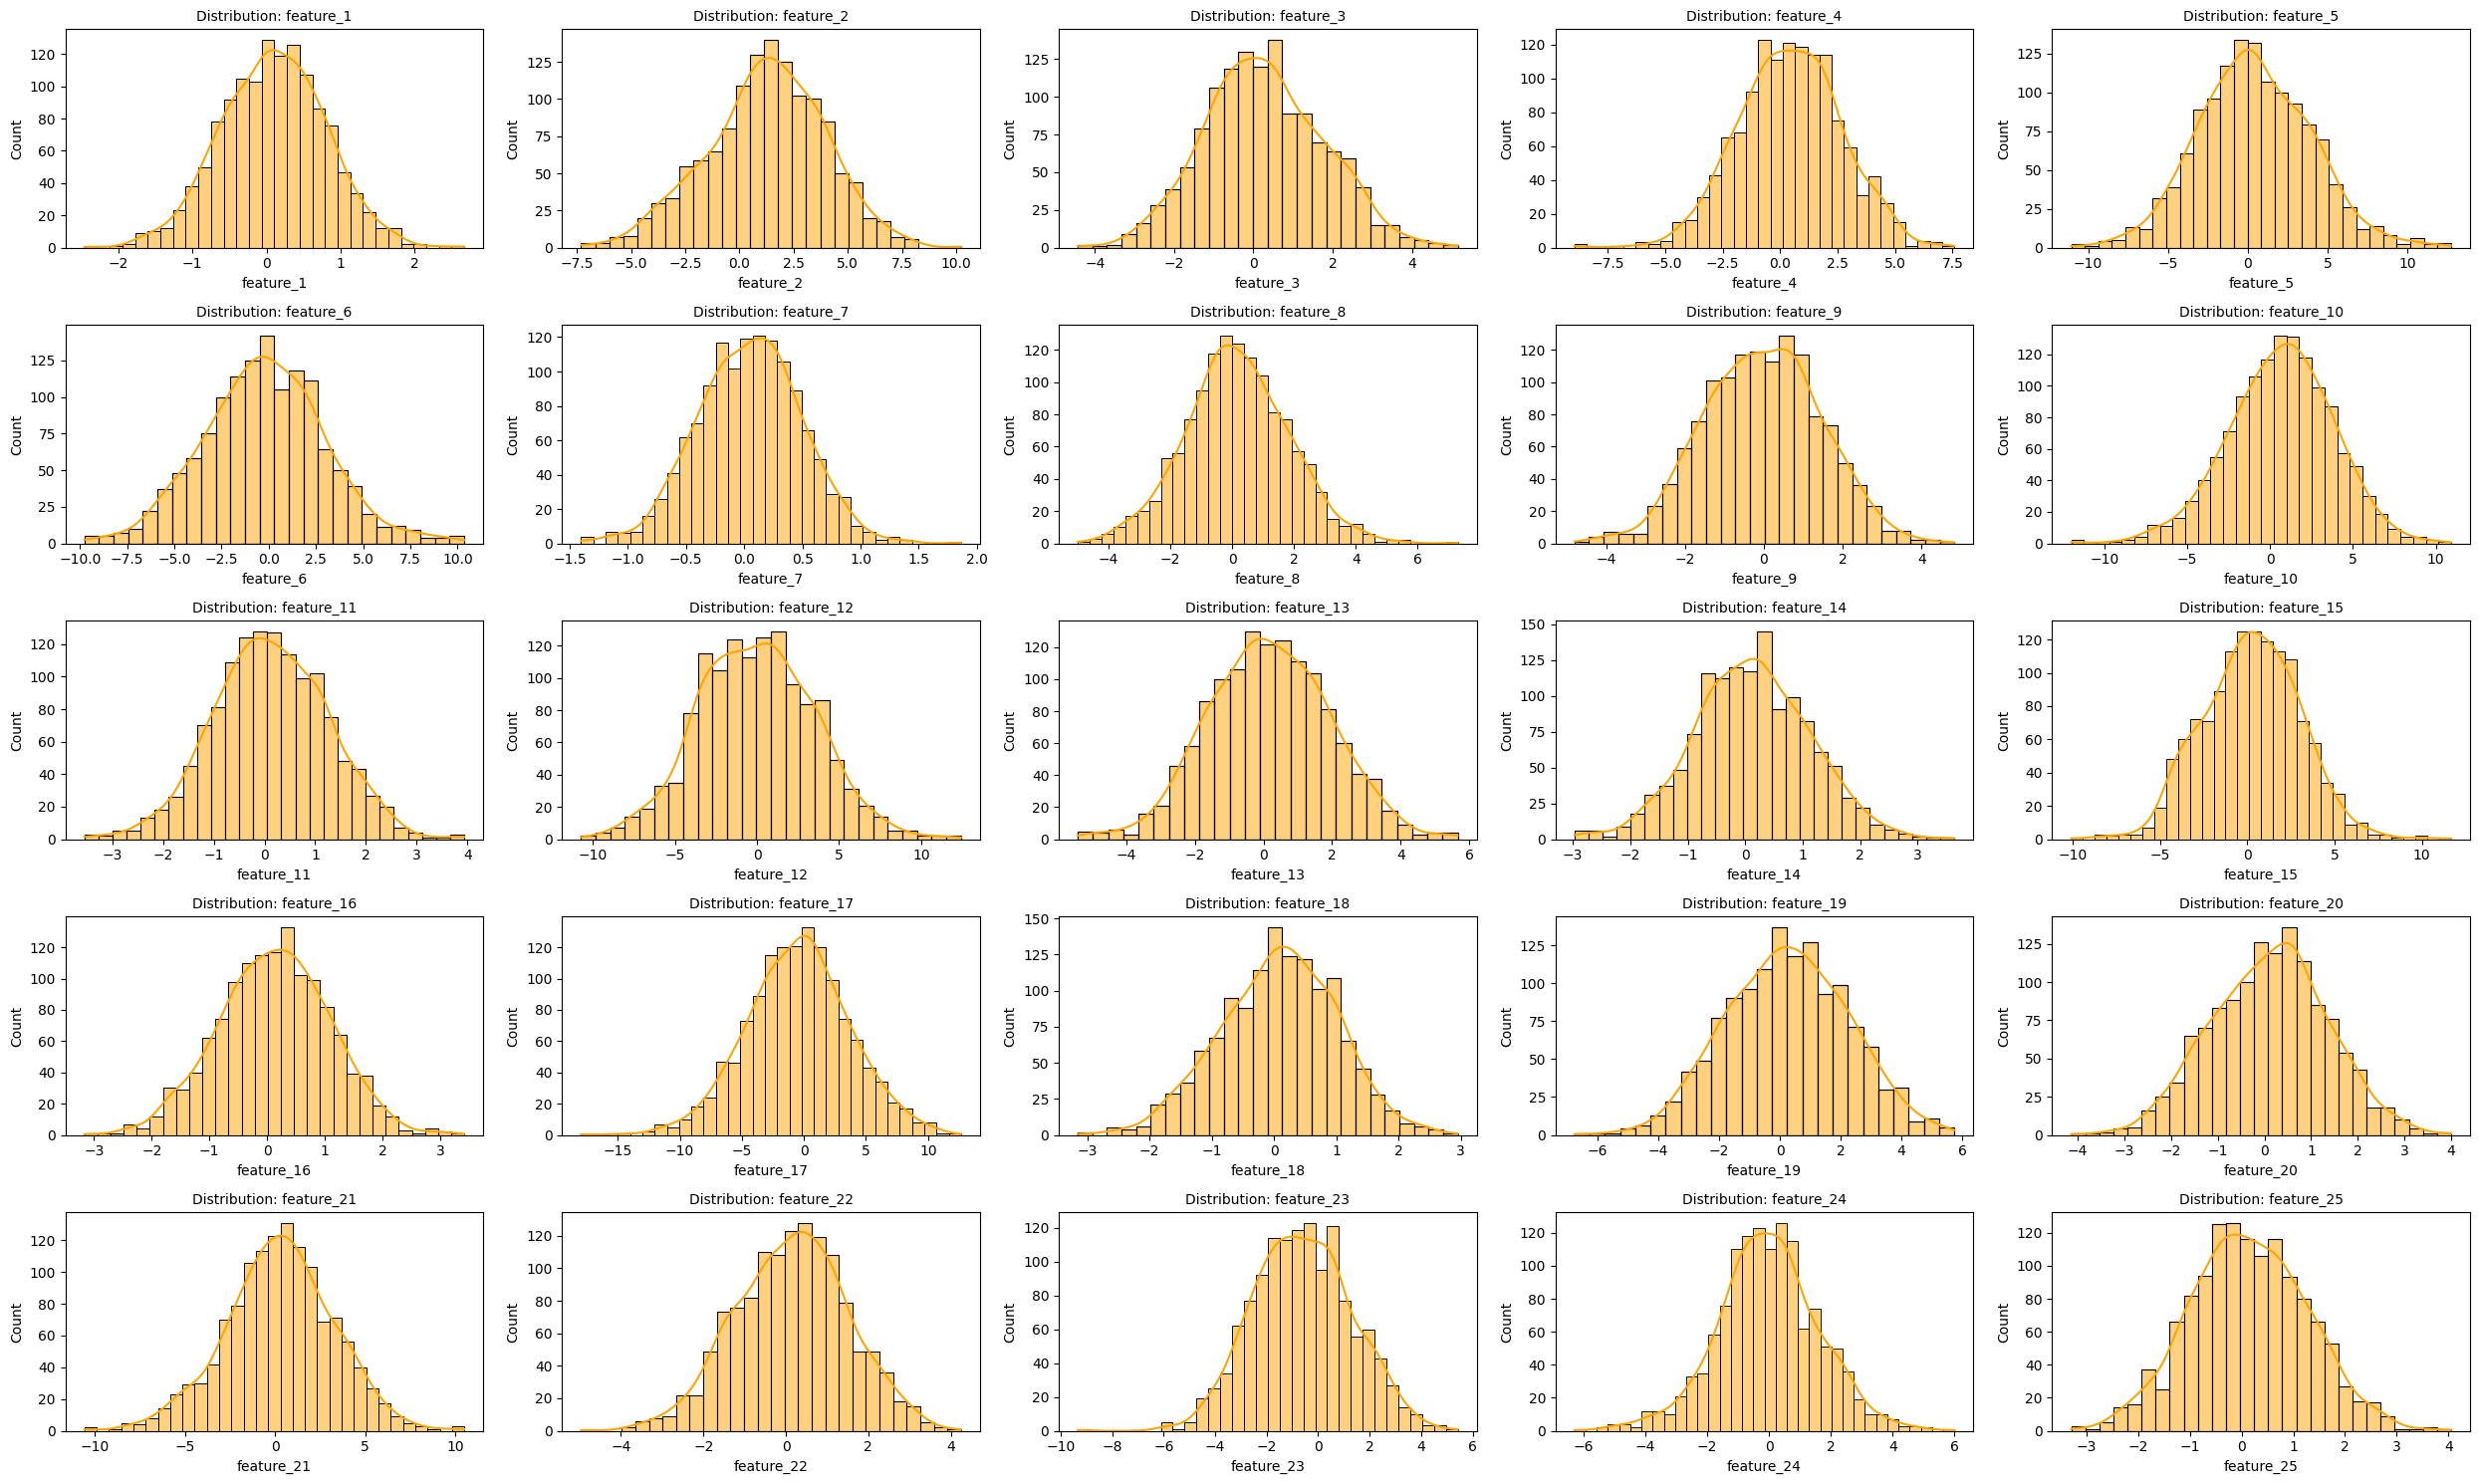

In [13]:
numeric_columns = X.select_dtypes(include = "number").columns
n_columns = 5
n_rows = int(np.ceil(len(numeric_columns) / n_columns))

fig, axes = plt.subplots(n_rows, n_columns, figsize = (n_columns * 5, n_rows * 3))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(data[column], kde = True, ax = axes[i], color = "orange")
    axes[i].set_title(f"Distribution: {column}", fontsize = 10)

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

For the most part, the features seem to follow a normal distribution centred around 0, with varying variances.

## Outliers

### Boxplots

Boxplots are useful tool for visual outlier analysis.

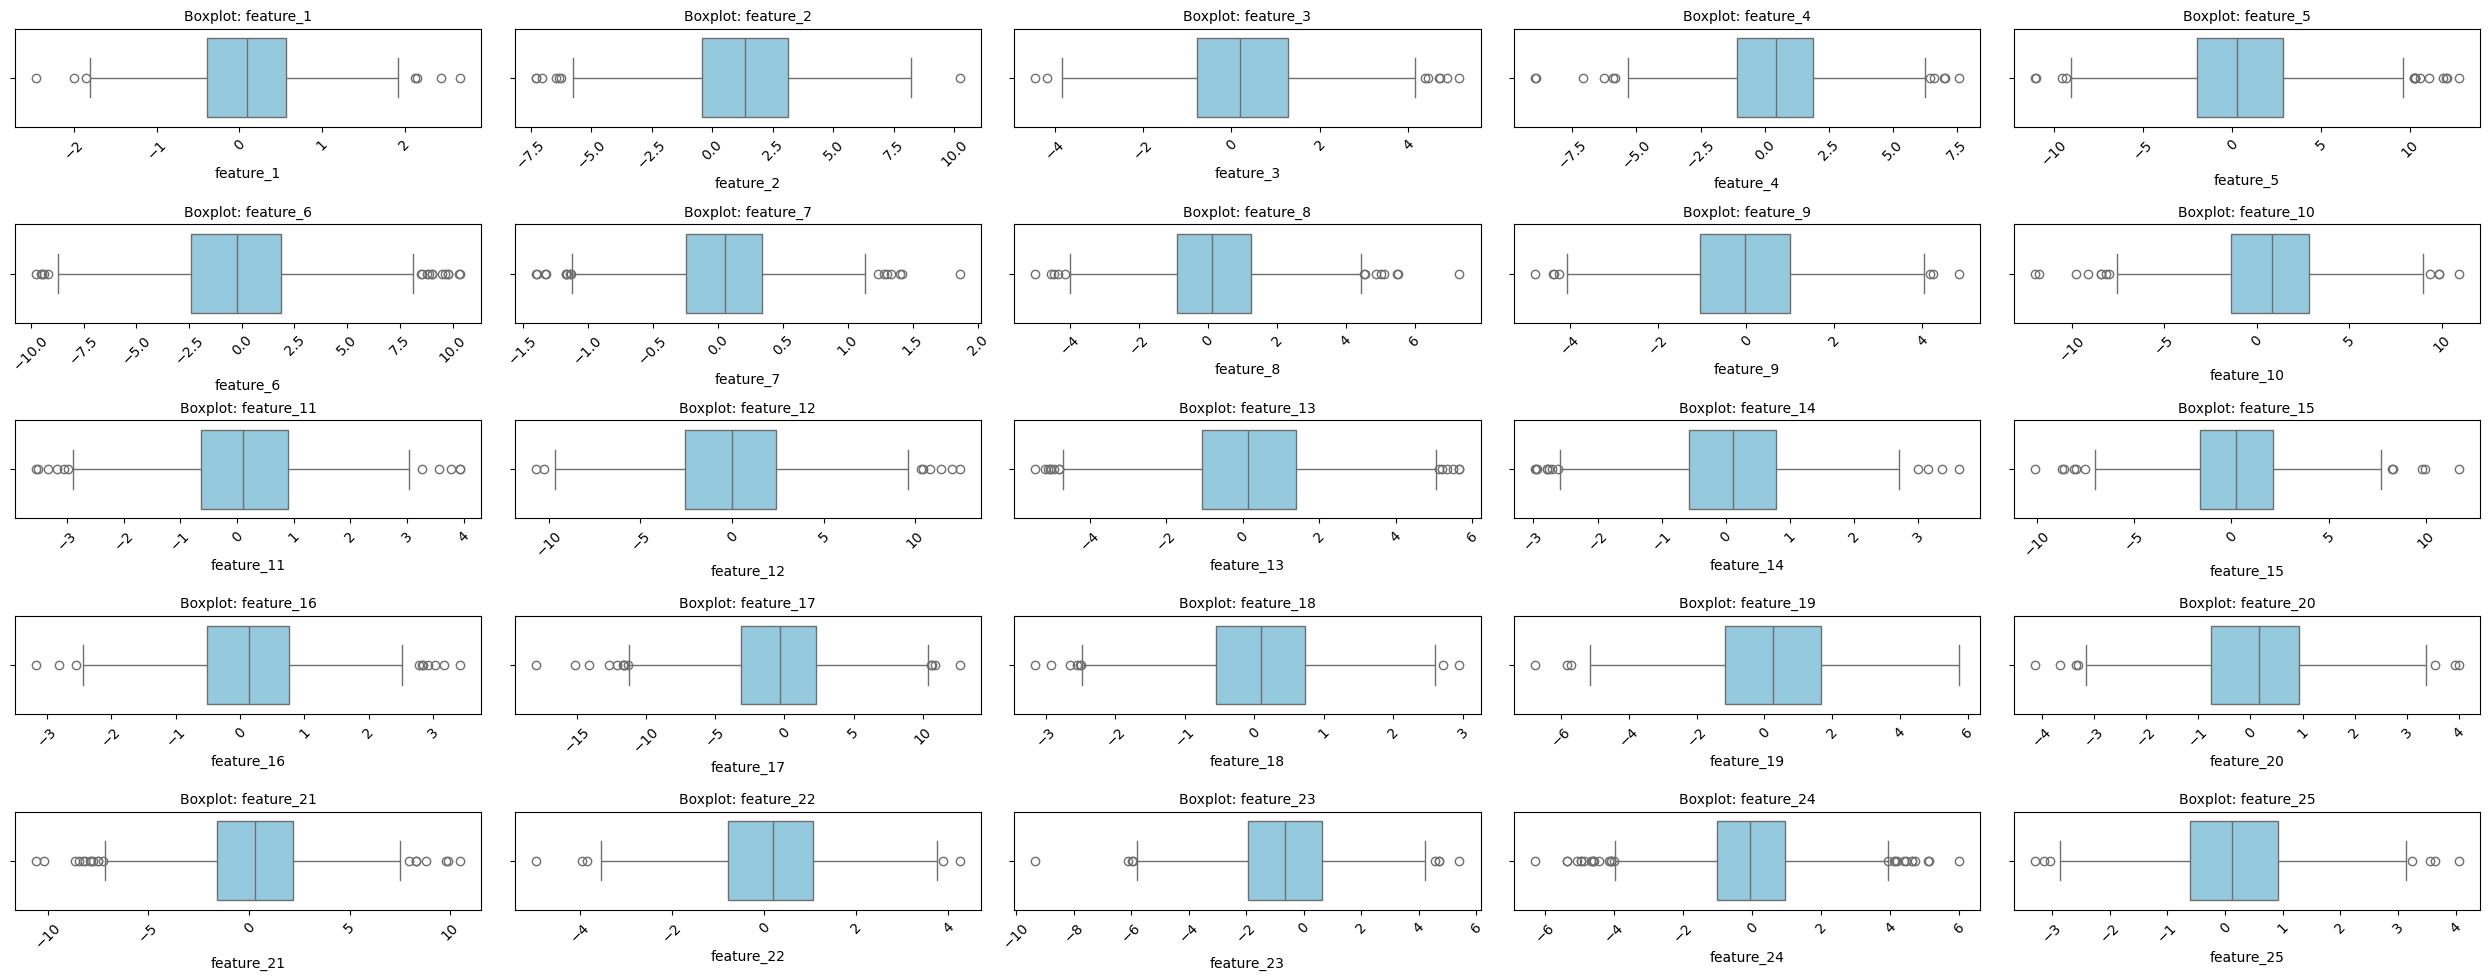

In [14]:
fig, axes = plt.subplots(n_rows, n_columns, figsize = (n_columns * 5, n_rows * 2))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x = data[column], ax = axes[i], color = "skyblue")
    axes[i].set_title(f"Boxplot: {column}", fontsize = 10)
    axes[i].tick_params(axis = "x", labelrotation = 45)

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

### z-score
Since the data follows an approximate normal distribution, `z`-scores can be used to identify outliers. Standardization of the data is required before identifying outliers.

In [15]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(data[numeric_columns])
scaled_data = pd.DataFrame(scaled_array, columns = numeric_columns)

The outliers are identified as those which surpass a certain threshold.

In [16]:
z_threshold = 3
outliers = (np.abs(scaled_data) > z_threshold)

outlier_rows = outliers.sum(axis = 1) # Number of outliers per row

data["outlier"] = (np.abs(scaled_data) > z_threshold).any(axis = 1)

The outliers seem to be evenly distributed among the labels

In [17]:
print("Number of outlier rows:", data["outlier"].sum())
print(f"Percentage of dataset: {round(data["outlier"].mean() * 100, 2)}%")

total_per_label = data.groupby("label").size().rename("total")
outliers_per_label = data[data["outlier"] == True].groupby("label").size().rename("outliers")

outlier_summary = pd.concat([total_per_label, outliers_per_label], axis = 1)
outlier_summary["outliers"] = outlier_summary["outliers"].astype(int)
outlier_summary["percent_outliers"] = (outlier_summary["outliers"] / outlier_summary["total"] * 100).round(2)

print(outlier_summary)

Number of outlier rows: 102
Percentage of dataset: 7.85%
       total  outliers  percent_outliers
label                                   
0        420        31              7.38
1        439        30              6.83
2        441        41              9.30


In [18]:
outlier_counts = data.groupby(["label", "categorical_feature_1", "outlier"]).size().unstack(fill_value = 0)

outlier_counts["total"] = outlier_counts.sum(axis = 1)
outlier_counts["%_outliers"] = (outlier_counts[True] / outlier_counts["total"]) * 100
outlier_counts["%_outliers"] = outlier_counts["%_outliers"].round(2)

outlier_counts[["total", True, "%_outliers"]]

outlier                      total  True  %_outliers
label categorical_feature_1                         
0     A                         71     5        7.04
      B                         66     4        6.06
      C                        283    22        7.77
1     A                        337    23        6.82
      B                        100     7        7.00
      C                          2     0        0.00
2     A                        284    28        9.86
      B                         80     6        7.50
      C                         77     7        9.09

Since the data doesn't have any intrinsic meaning and the outliers are evenly distributed, the outliers will be retained for now. The decision to remove outliers will depend on the models (specifically logistic regression which may struggle with outliers).

## Association between features

### Linear relationships
An initial Pearson correlation heat map quickly provides an idea of linear correlation between features.

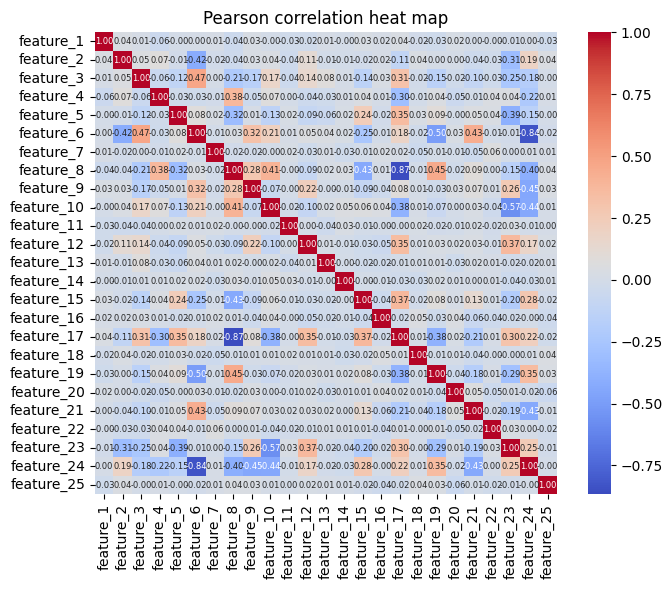

In [19]:
pearson_correlation = X.corr(numeric_only = True, method = "pearson")

plt.figure(figsize = (8, 6))
sns.heatmap(
    pearson_correlation,
    annot = True,
    cmap = "coolwarm",
    fmt = ".2f",
    square = True,
    annot_kws = {"size": 6}
)
plt.title("Pearson correlation heat map")
plt.show()

By selecting the feature pairs with correlation beyond a certain threshold, their relationships can be graphed for further insight.

In [20]:
def plot_correlated_pairs(data, correlation_matrix: pd.DataFrame, threshold: float = 0.5):
    correlation_pairs = (
        correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k = 1).astype(bool))
        .stack()
        .reset_index()
    )

    correlation_pairs.columns = ["Feature1", "Feature2", "Correlation"]

    strong_pairs = correlation_pairs[correlation_pairs["Correlation"].abs() >= threshold]
    strong_features = set(strong_pairs[["Feature1", "Feature2"]].values.flatten())

    print(f"Top pairs with correlation >= {threshold}:\n", strong_pairs)

    sns.pairplot(data, vars = strong_features, hue = "label")
    plt.show()

Top pairs with correlation >= 0.5:
        Feature1    Feature2  Correlation
122   feature_6  feature_19    -0.501156
127   feature_6  feature_24    -0.835566
155   feature_8  feature_17    -0.866148
192  feature_10  feature_23    -0.571657


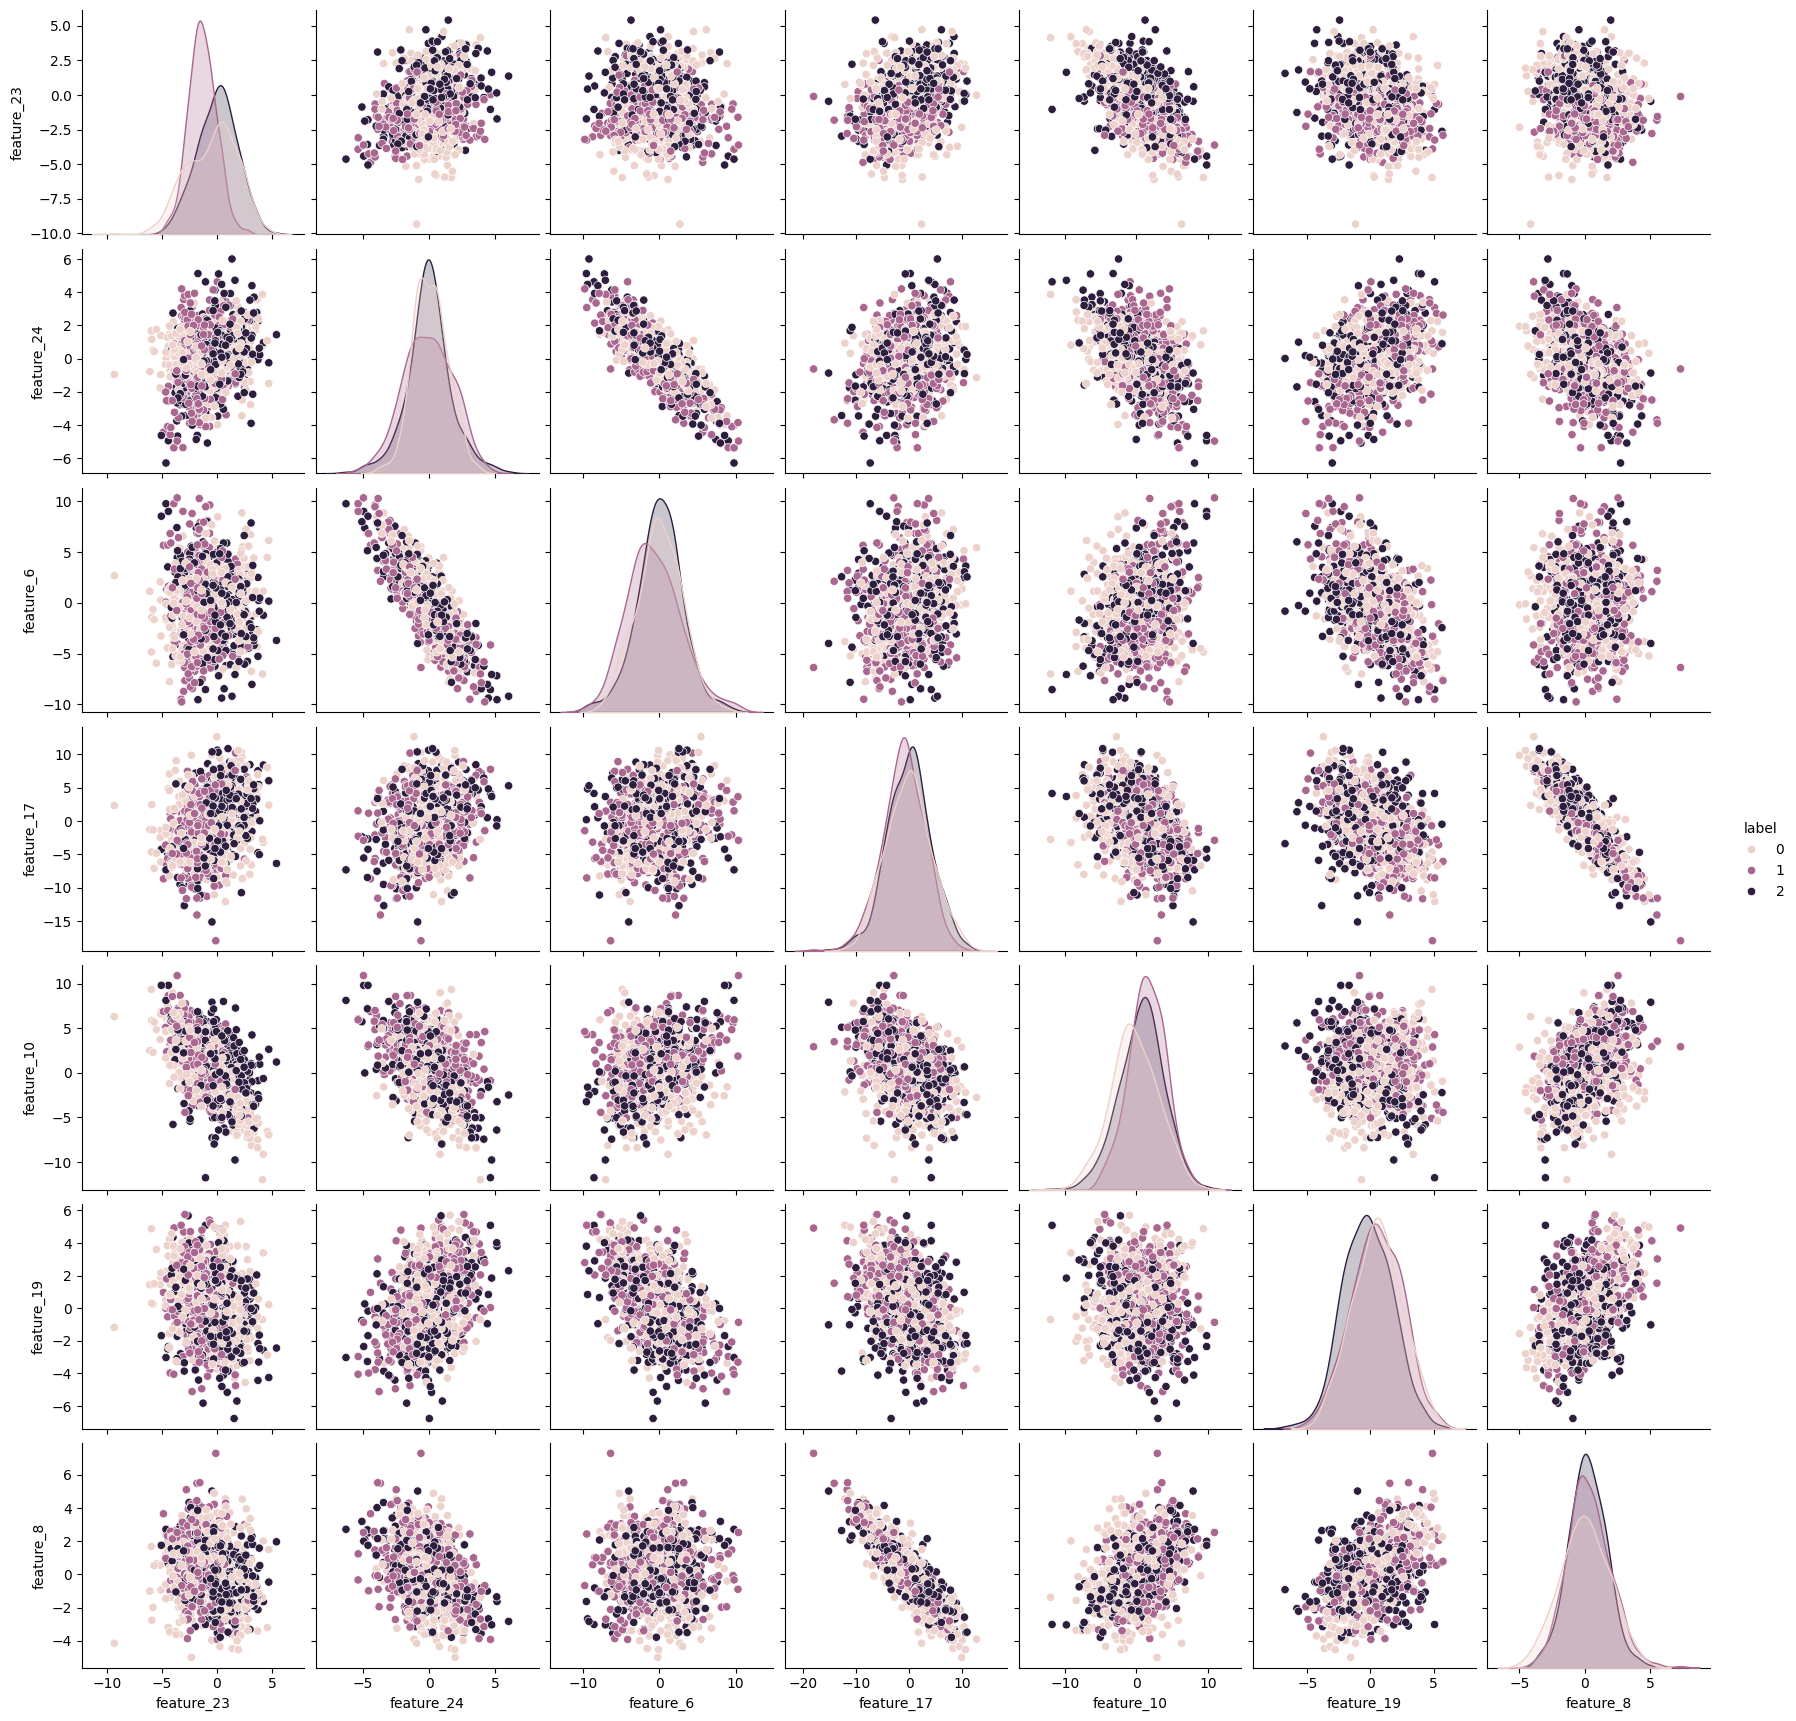

In [21]:
plot_correlated_pairs(data, pearson_correlation, 0.5)

Some mild to strong correlation can be seen from the plots and the printed correlation values.

### Monotonic relationships
Pearson correlation only detects linear relationships in the data, so Spearman's correlation must be used to identify general monotonic relationships in the data which are not necessarily linear.

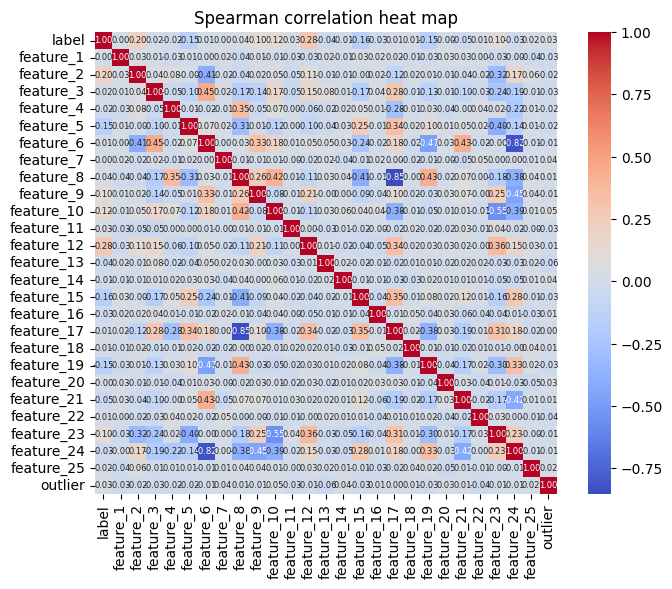

In [22]:
spearman_correlation = data.corr(numeric_only = True, method = "spearman")

plt.figure(figsize = (8, 6))
sns.heatmap(
    spearman_correlation,
    annot = True,
    cmap = "coolwarm",
    fmt = ".2f",
    square = True,
    annot_kws = {"size": 6}
)
plt.title("Spearman correlation heat map")
plt.show()

Top pairs with correlation >= 0.5:
        Feature1    Feature2  Correlation
158   feature_6  feature_24    -0.817549
188   feature_8  feature_17    -0.852916
227  feature_10  feature_23    -0.554155


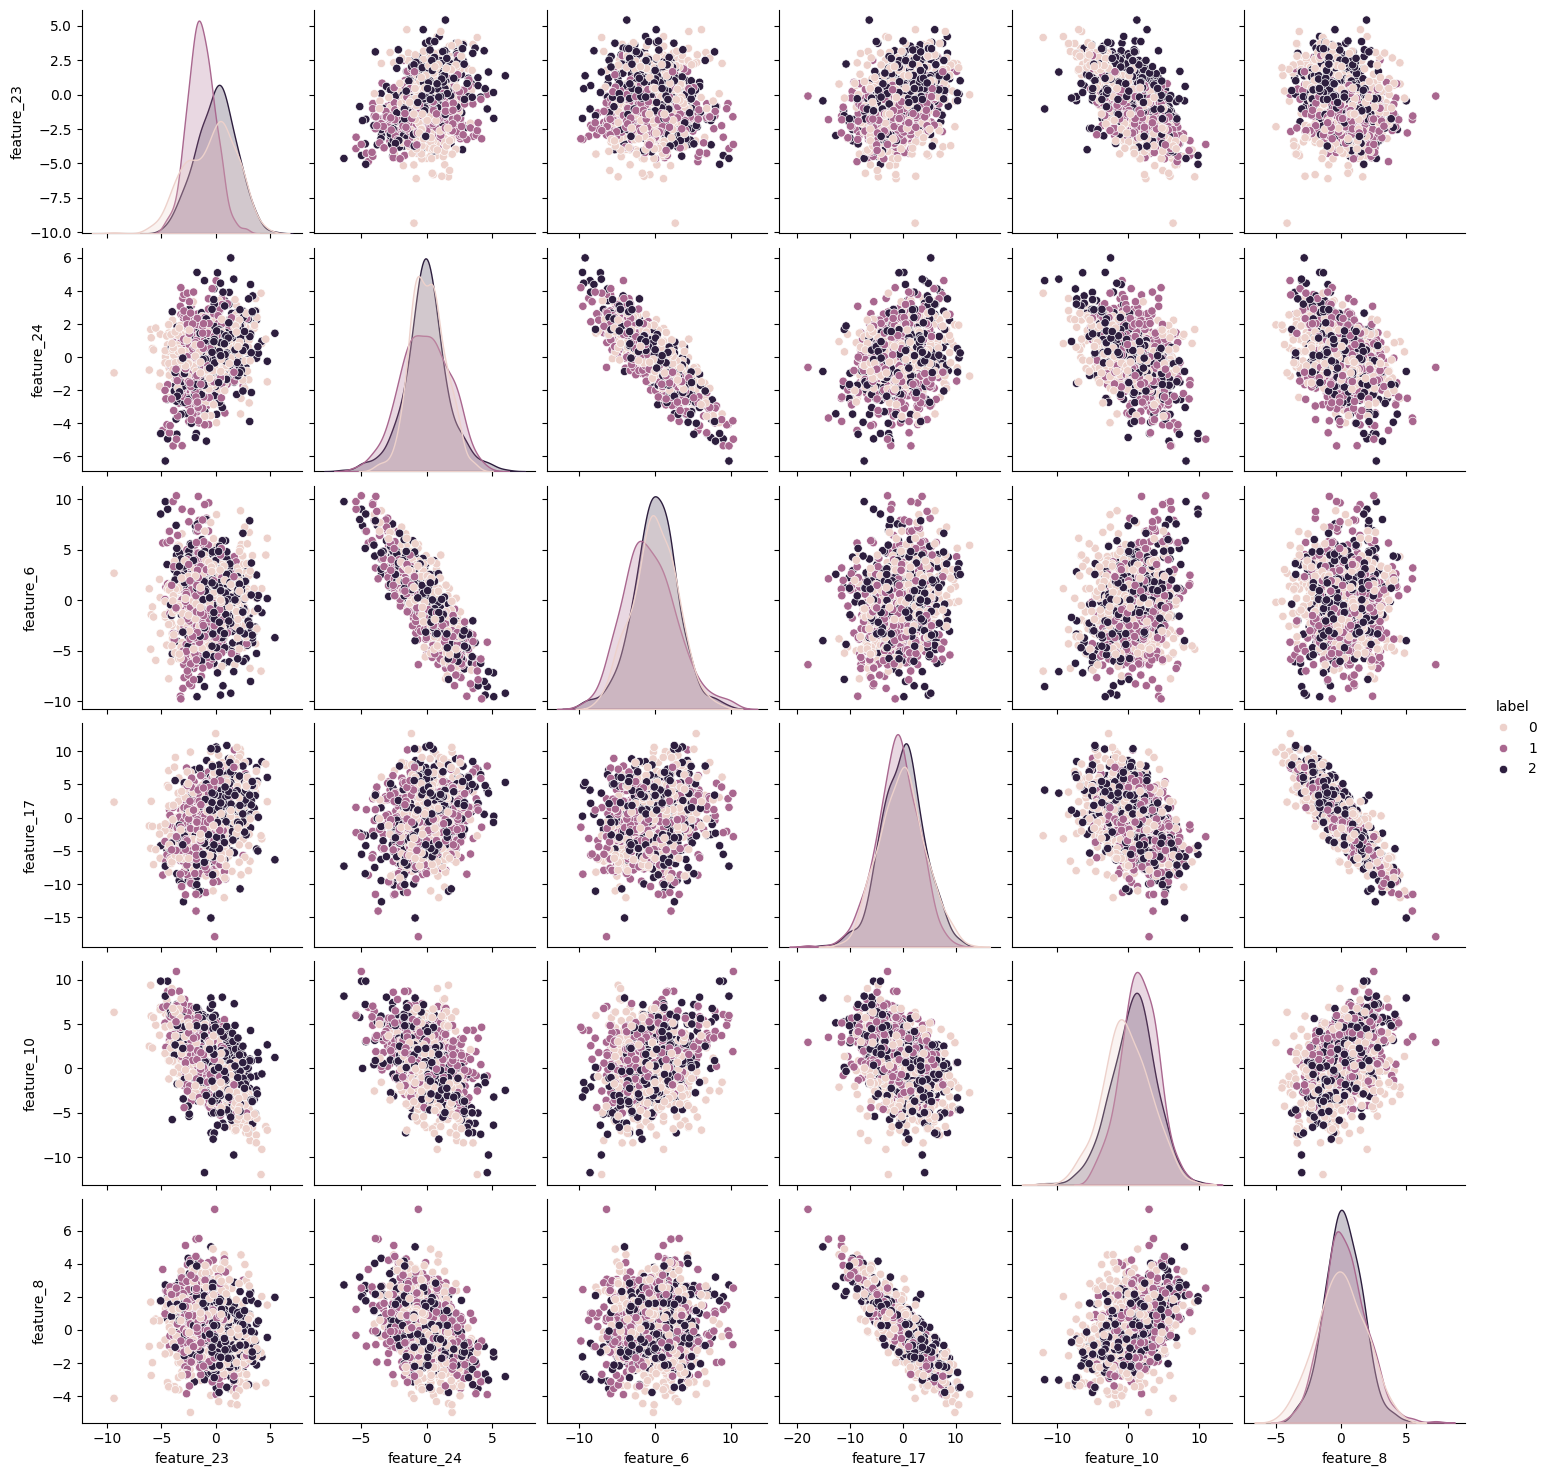

In [23]:
plot_correlated_pairs(data, spearman_correlation, 0.5)

The only relationships found however are the linear relationships indentified previously.

---
# Individual models

A standard 75-25 train-test split is used, where the split is stratified to ensure the split is representative of the data.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11, stratify = y)

## Functions

In [25]:
def summarize_crossvalidation(search: GridSearchCV):
    """Summarize model data for cross-validation."""
    best_model = search.best_estimator_
    
    print("Best Parameters:", search.best_params_)
    print("Best Score (CV avg):", search.best_score_)
    
    attributes = {
        "C": "C",
        # Logistic regression
        "penalty": "Penalty",
        # Random forest
        "n_estimators": "Number of decision trees",
        "max_depth": "Maximum tree depth",
        "min_samples_split": "Minimum samples to split",
        "min_samples_leaf": "Minimum samples per leaf",
        "max_features": "Maximum features considered at each split",
        "bootstrap": "Bootstrap",
        "feature_importances_": "Feature importances",
    }
    
    for attribute, name in attributes.items():
        if hasattr(best_model, attribute):
            print(f"{name}:", getattr(best_model, attribute))

Plotting the learning curve during grid search helps visualize how each hyperparameter value affects the accuracy of the model. This is especially useful for determining if the parameter grid needs to be extended.

In [26]:
def plot_learning_curve(
    search: GridSearchCV,
    param_names: str | list[str],
    plot_title: str = "Learning Curve",
    scoring_label: str | None = None
):
    if not isinstance(param_names, list):
        param_names = [param_names]
    
    results = search.cv_results_
    n_params = len(param_names)
    
    # Adjust figure size depending on number of subplots
    fig, axes = plt.subplots(n_params, 1, figsize = (10, 4 * n_params), squeeze = False)
    
    if scoring_label is None:
        scoring_label = search.scoring if isinstance(search.scoring, str) else "score"
        
    for i, param in enumerate(param_names):
        raw_values = [params[param] for params in results["params"]]

        # Detect type: numeric or not
        if all(isinstance(val, (int, float)) for val in raw_values):
            param_range = np.array(raw_values)
            unique_param_range = np.unique(param_range)
            is_numeric = True

            # Detect if log scale is appropriate
            use_log_scale = (
                np.all(unique_param_range > 0) and
                np.max(unique_param_range) / np.min(unique_param_range) > 100
            )
        else:
            param_range = [str(val) for val in raw_values]
            unique_param_range = sorted(set(param_range))
            is_numeric = False
            use_log_scale = False

        train_scores = []
        val_scores = []
        std_scores = []

        for value in unique_param_range:
            if is_numeric:
                mask = param_range == value
            else:
                mask = [v == value for v in param_range]

            train_scores.append(np.mean(np.array(results["mean_train_score"])[mask]))
            val_scores.append(np.mean(np.array(results["mean_test_score"])[mask]))
            std_scores.append(np.mean(np.array(results["std_test_score"])[mask]))

        axis = axes[i, 0]
        x_values = unique_param_range if is_numeric else range(len(unique_param_range))
        
        if is_numeric and use_log_scale:
            axis.set_xscale("log")
        
        # Plot training scores on left y-axis
        axis.plot(x_values, train_scores, label = "Training score", marker = "o", color = "tab:blue")
        axis.set_ylabel(f"Train {scoring_label}", color = "tab:blue")
        axis.tick_params(axis = "y", labelcolor = "tab:blue")

        # Plot validation scores on right y-axis
        axis2 = axis.twinx()
        axis2.plot(x_values, val_scores, label = "Validation score", marker = "s", color = "tab:orange")
        axis2.fill_between(
            x_values,
            np.array(val_scores) - np.array(std_scores),
            np.array(val_scores) + np.array(std_scores),
            alpha = 0.2,
            color = "tab:orange"
        )
        axis2.set_ylabel(f"Validation {scoring_label}", color = "tab:orange")
        axis2.tick_params(axis = "y", labelcolor = "tab:orange")

        axis.set_title(f"{plot_title} ({param})")
        axis.set_xlabel(param)
        axis.grid(True)

        if not is_numeric:
            axis.set_xticks(x_values)
            axis.set_xticklabels(unique_param_range, rotation = 45)

    plt.tight_layout()
    plt.show()

In [27]:
def test_model(model, X_test, y_test, verbose: bool = True):
    if verbose:
        print("========================= Testing =========================")
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    if verbose:
        cm = confusion_matrix(y_test, predictions)
        labels = range(0, 3)
        cm_df = pd.DataFrame(cm, index=[f"Actual {l}" for l in labels], columns = [f"Predicted {l}" for l in labels])
        print("Confusion matrix:")
        print(cm_df)
        print("Accuracy:", accuracy)
        print("Classification report:\n", classification_report(y_test, predictions))
    
    return accuracy

## Logistic regression
While logistic regression is typically a binary classification model, using a one-vs-rest technique which is built in to `LogisticRegression`, it can also be used for multiclass classification.

### Training

`StratifiedKFold` is used for crossvalidation to ensure the cross-validation folds account for the proportions of labels in the data. The categorical feature must manually be encoded for `LogisticRegression` to handle it. `L2` regularization is used to deal with the multicollinearity by not assigning any of said features too much importance.

In [104]:
def train_logistic_regression(
    X_train,
    y_train,
    random_state: int = 11,
    n_jobs: int = -1,
    verbose: bool = True
):
    numerical_columns = X_train.select_dtypes(include = "number").columns
    categorical_columns = X_train.select_dtypes(exclude = "number").columns
    
    preprocessor = ColumnTransformer(
        transformers = [
            ("num", StandardScaler(), numerical_columns),
            ("cat", OneHotEncoder(drop = "first"), categorical_columns)
        ]
    )
    
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(solver = "saga", penalty = "l2", max_iter = 1000, random_state = random_state, n_jobs = n_jobs))
    ])
    
    params = {
        "classifier__C": [0.001, 0.01, 0.1, 0.5, 1, 2, 5],
        "classifier__class_weight": ["balanced", None]
    }
    
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = random_state)
    
    pipeline = GridSearchCV(
        estimator = pipeline,
        param_grid = params,
        refit = True,
        scoring = "f1_macro",
        cv = cv,
        n_jobs = n_jobs,
        return_train_score = True
    )
    
    pipeline.fit(X_train, y_train)
    
    if verbose:
        summarize_crossvalidation(pipeline)
        print("Training accuracy:", pipeline.score(X_train, y_train))
        
        # plot_learning_curve(pipeline, list(params.keys()))
    
    return pipeline.best_estimator_

In [29]:
def train_test_logistic_regression(
    X: pd.DataFrame,
    y: pd.Series,
    test_size: float | None = None,
    train_size: float | None = None,
    random_state: int = 11,
    n_jobs: int = -1,
    verbose: bool = True
):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = test_size, train_size = train_size, random_state = random_state, stratify = y
    )
    
    if verbose:
        print("Training data dimensions:", X_train.shape)
        print("Testing data dimensions:", X_test.shape)
    
    model = train_logistic_regression(X_train, y_train, random_state, n_jobs, verbose)
    
    accuracy = test_model(model, X_test, y_test, verbose)
    if not verbose:
        print(accuracy)
    
    return model

In [105]:
logistic_regression = train_test_logistic_regression(X, y)

Training data dimensions: (975, 26)
Testing data dimensions: (325, 26)
Best Parameters: {'classifier__C': 5, 'classifier__class_weight': 'balanced'}
Best Score (CV avg): 0.7108169961246609
Training accuracy: 0.7387485032412568
========================= Testing =========================
Confusion matrix:
          Predicted 0  Predicted 1  Predicted 2
Actual 0           79           18            8
Actual 1            6           88           16
Actual 2           16           29           65
Accuracy: 0.7138461538461538
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77       105
           1       0.65      0.80      0.72       110
           2       0.73      0.59      0.65       110

    accuracy                           0.71       325
   macro avg       0.72      0.71      0.71       325
weighted avg       0.72      0.71      0.71       325



In [106]:
logistic_regression_no_outliers = train_test_logistic_regression(X[data["outlier"] == False], y[data["outlier"] == False])

Training data dimensions: (898, 26)
Testing data dimensions: (300, 26)
Best Parameters: {'classifier__C': 0.1, 'classifier__class_weight': None}
Best Score (CV avg): 0.6978575067329117
Training accuracy: 0.7206404248672289
========================= Testing =========================
Confusion matrix:
          Predicted 0  Predicted 1  Predicted 2
Actual 0           70           14           13
Actual 1            2           81           20
Actual 2           12           17           71
Accuracy: 0.74
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77        97
           1       0.72      0.79      0.75       103
           2       0.68      0.71      0.70       100

    accuracy                           0.74       300
   macro avg       0.75      0.74      0.74       300
weighted avg       0.75      0.74      0.74       300



Removing the outliers only slightly improves logistic regression.

To ensure the chosen random state value doesn't cause significantly worse fits than on average, other seeds can be checked.

In [107]:
for i in range(0, 100, 10):
    print("Seed:", i)
    train_test_logistic_regression(X, y, random_state = i, verbose = False)
    print()

Seed: 0
0.676923076923077

Seed: 10
0.7446153846153846

Seed: 20
0.7046153846153846

Seed: 30
0.7476923076923077

Seed: 40
0.7323076923076923

Seed: 50
0.6892307692307692

Seed: 60
0.6984615384615385

Seed: 70
0.6861538461538461

Seed: 80
0.6984615384615385

Seed: 90
0.6953846153846154



### Feature selection
Since `LogisticRegression` exposes the coefficients in the model, features can be directly selected from the trained model as an initial approach to feature selection. Feature selection may help generalize the models and make them more robust to noise.

In [33]:
def get_selected_features_from_model(estimator: BaseEstimator, verbose: bool = True):
    selector = SelectFromModel(estimator, prefit = True)
    mask = selector.get_support()
    features = [i for i in range(len(mask)) if mask[i]]
    
    if verbose:
        print(f"Top {len(features)} features:")
        print(features)
    
    return features

In [51]:
top_features = {}
top_features["logistic_regression"] = get_selected_features_from_model(logistic_regression.named_steps["classifier"])

Top 23 features:
[0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 24, 25, 26]


In [55]:
logistic_regression_top_features = train_test_logistic_regression(X.iloc[:, top_features["logistic_regression"][:-1]], y)

Training data dimensions: (975, 22)
Testing data dimensions: (325, 22)
Best Parameters: {'classifier__C': 1, 'classifier__class_weight': 'balanced'}
Best Score (CV avg): 0.7128205128205127
Training accuracy: 0.7394871794871795
========================= Testing =========================
Confusion matrix:
          Predicted 0  Predicted 1  Predicted 2
Actual 0           79           18            8
Actual 1            6           88           16
Actual 2           16           29           65
Accuracy: 0.7138461538461538
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77       105
           1       0.65      0.80      0.72       110
           2       0.73      0.59      0.65       110

    accuracy                           0.71       325
   macro avg       0.72      0.71      0.71       325
weighted avg       0.72      0.71      0.71       325



Training on just the selected features does not improve the accuracy.

In [36]:
def get_selected_features(
    pipeline: Pipeline,
    X_train,
    step_names: list[str]
) -> list[str]:
    feature_names = X_train.columns
    
    for name in step_names:
        selector = pipeline.named_steps[name]
        mask = selector.get_support()
        feature_names = feature_names[mask]
        
    return feature_names.to_list()

In [37]:
def feature_selection_logistic_regression(
    X: pd.DataFrame,
    y: pd.Series,
    test_size: float | None = None,
    train_size: float | None = None,
    random_state: int = 11,
    n_jobs: int = -1,
    verbose: bool = True
):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = test_size, train_size = train_size, random_state = random_state, stratify = y
    )
    
    if verbose:
        print("Training data dimensions:", X_train.shape)
        print("Testing data dimensions:", X_test.shape)
    
    numerical_columns = X_train.select_dtypes(include = "number").columns
    categorical_columns = X_train.select_dtypes(exclude = "number").columns
    
    preprocessor = ColumnTransformer(
        transformers = [
            ("num", StandardScaler(), numerical_columns),
            ("cat", OneHotEncoder(drop = "first"), categorical_columns)
        ]
    )
    
    svm_selector = SelectFromModel(
        estimator = LinearSVC(penalty = "l1", dual = False, max_iter = 5000),
        prefit = False
    )
    
    classifier = LogisticRegression(solver = "lbfgs", max_iter = 1000)
    
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("feature_selection", svm_selector),
        ("classifier", classifier)
    ])
    
    params = {
        "feature_selection__estimator__C": [0.01, 0.1, 1, 10],
        "classifier__C": [0.01, 0.1, 1, 10]
    }
    
    pipeline = GridSearchCV(
        estimator = pipeline,
        param_grid = params,
        cv = 5,
        refit = True,
        scoring = "accuracy",
        n_jobs = n_jobs,
        return_train_score = True
    )

    # 7. Fit model
    pipeline.fit(X_train, y_train)
    
    if verbose:
        summarize_crossvalidation(pipeline)
        print("Training accuracy:", pipeline.score(X_train, y_train))
        
        # plot_learning_curve(pipeline, list(params.keys()))
    
    model = pipeline.best_estimator_
    
    accuracy = test_model(model, X_test, y_test)
    return model

In [56]:
logistic_regression_feature_selection = feature_selection_logistic_regression(X, y)

Training data dimensions: (975, 26)
Testing data dimensions: (325, 26)
Best Parameters: {'classifier__C': 1, 'feature_selection__estimator__C': 0.1}
Best Score (CV avg): 0.7128205128205128
Training accuracy: 0.7405128205128205
========================= Testing =========================
Confusion matrix:
          Predicted 0  Predicted 1  Predicted 2
Actual 0           79           18            8
Actual 1            4           90           16
Actual 2           16           28           66
Accuracy: 0.7230769230769231
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77       105
           1       0.66      0.82      0.73       110
           2       0.73      0.60      0.66       110

    accuracy                           0.72       325
   macro avg       0.73      0.72      0.72       325
weighted avg       0.73      0.72      0.72       325



/Users/joshuatan/Documents/Programming/MachineLearningProject/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Feature selection using an SVM preselector does not improve accuracy either.

## Random forest
Unlike logistic regression, which uses a one-vs-rest classifier for multiclass classification, random forest inherently supports multiclass classification as part of its model.

### Training
It's important to prune the trees to avoid overfitting the data. For example, this involves setting the minimum samples per leaf to a number greater than one. Due to the computational complexity of fine-tuning random forest, `RandomizedSearchCV` is used to find the optimal hyperparameters without doing such a comprehensive and intensive search like `GridSearchCV`.

In [39]:
def train_random_forest(
    X_train,
    y_train,
    random_state: int = 11,
    n_jobs: int = -1,
    verbose: bool = True
):
    numerical_columns = X_train.select_dtypes(include = "number").columns
    categorical_columns = X_train.select_dtypes(exclude = "number").columns
    
    preprocessor = ColumnTransformer(
        transformers = [
            ("cat", OneHotEncoder(handle_unknown = "warn"), categorical_columns)
        ],
        remainder = "passthrough"
    )
    
    pipeline = Pipeline(steps = [
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(random_state = random_state, n_jobs = n_jobs))
    ])
    
    rf_params = {
        "n_estimators": [25, 50, 60, 100, 150, 200],
        "max_depth": [3, 5, 10, 15, 20],
        "min_samples_split": [2, 10, 20],
        "min_samples_leaf": [2, 4, 6, 8, 10],
        "max_features": ["sqrt", "log2"],
        "bootstrap": [True, False],
        "class_weight": ["balanced", None]
    }
    
    params = {f"classifier__{param}": options for param, options in rf_params.items()}
    
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = random_state)
    
    pipeline = RandomizedSearchCV(
        estimator = pipeline,
        param_distributions = params,
        refit = True,
        scoring = "f1_macro",
        cv = cv,
        random_state = random_state,
        n_jobs = n_jobs,
        return_train_score = True
    )
    
    pipeline.fit(X_train, y_train)
    
    if verbose:
        summarize_crossvalidation(pipeline)
        print("Training accuracy:", pipeline.score(X_train, y_train))
        
        #plot_learning_curve(pipeline, list(params.keys()))
    
    return pipeline.best_estimator_

In [68]:
def train_test_random_forest(
    X: pd.DataFrame,
    y: pd.Series,
    test_size: float | None = None,
    train_size: float | None = None,
    random_state: int = 11,
    n_jobs: int = -1,
    verbose: bool = True
):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = test_size, train_size = train_size, random_state = random_state, stratify = y
    )
    
    if verbose:
        print("Training data dimensions:", X_train.shape)
        print("Testing data dimensions:", X_test.shape)
    
    model = train_random_forest(X_train, y_train, random_state, n_jobs, verbose)
    
    accuracy = test_model(model, X_test, y_test, verbose)
    
    if not verbose:
        print(accuracy)
    
    return model

In [41]:
random_forest = train_test_random_forest(X, y)

Training data dimensions: (975, 26)
Testing data dimensions: (325, 26)
Best Parameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 8, 'classifier__max_features': 'log2', 'classifier__max_depth': 20, 'classifier__class_weight': 'balanced', 'classifier__bootstrap': False}
Best Score (CV avg): 0.765667148992152
Training accuracy: 0.9567331969036995
========================= Testing =========================
Confusion matrix:
          Predicted 0  Predicted 1  Predicted 2
Actual 0           84           16            5
Actual 1            2           99            9
Actual 2           13           22           75
Accuracy: 0.7938461538461539
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       105
           1       0.72      0.90      0.80       110
           2       0.84      0.68      0.75       110

    accuracy                           0.79       32

The large difference between the training accuracy and the test accuracy suggests that despite pruning the trees, the model is still overfitting to noise.

In [42]:
random_forest_no_outliers = train_test_random_forest(X[data["outlier"] == False], y[data["outlier"] == False])

Training data dimensions: (898, 26)
Testing data dimensions: (300, 26)
Best Parameters: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 20, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'log2', 'classifier__max_depth': 10, 'classifier__class_weight': None, 'classifier__bootstrap': False}
Best Score (CV avg): 0.7654099802737913
Training accuracy: 0.9685944700983007
========================= Testing =========================
Confusion matrix:
          Predicted 0  Predicted 1  Predicted 2
Actual 0           74           14            9
Actual 1            0           92           11
Actual 2           10           15           75
Accuracy: 0.8033333333333333
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82        97
           1       0.76      0.89      0.82       103
           2       0.79      0.75      0.77       100

    accuracy                           0.80       300
   

Training the random forest after removing the outliers has negligent positive effect on the model, which is to be expected as random forests can inherently deal with outliers.

Again, the seed can be checked to ensure it isn't a bad choice.

In [69]:
for i in range(0, 100, 10):
    print("Seed:", i)
    train_test_random_forest(X, y, random_state = i, verbose = False)
    print()

Seed: 0
0.7907692307692308

Seed: 10
0.8153846153846154

Seed: 20
0.7876923076923077

Seed: 30
0.8184615384615385

Seed: 40
0.8553846153846154

Seed: 50
0.7538461538461538

Seed: 60
0.8

Seed: 70
0.7753846153846153

Seed: 80
0.7507692307692307

Seed: 90
0.7538461538461538



### Feature selection

In [43]:
top_features["random_forest"] = get_selected_features_from_model(random_forest.named_steps["classifier"])

Top 10 features:
[0, 2, 4, 7, 12, 14, 17, 21, 23, 25]


In [44]:
random_forest_top_features = train_test_random_forest(X.iloc[:, top_features["random_forest"]], y)

Training data dimensions: (975, 10)
Testing data dimensions: (325, 10)
Best Parameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 8, 'classifier__max_features': 'log2', 'classifier__max_depth': 20, 'classifier__class_weight': 'balanced', 'classifier__bootstrap': False}
Best Score (CV avg): 0.6555211933098395
Training accuracy: 0.8714561171393903
========================= Testing =========================
Confusion matrix:
          Predicted 0  Predicted 1  Predicted 2
Actual 0           75           20           10
Actual 1            5           85           20
Actual 2           15           55           40
Accuracy: 0.6153846153846154
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75       105
           1       0.53      0.77      0.63       110
           2       0.57      0.36      0.44       110

    accuracy                           0.62       3

Training a model on such a small pool of selected features harms the model as there is not enough information to accurately predict the data.

---
# Ensembling

## Logistic regression with bagging
The the general concept behind the ensembling of decision trees through bootstrap aggregation and random feature sampling can be used to build an ensemble logistic regression model.

In [108]:
def train_bagged_logistic_regression(
    X_train,
    y_train,
    random_state: int = 11,
    n_jobs: int = -1,
    verbose: bool = True
):
    numerical_columns = X_train.select_dtypes(include = "number").columns
    categorical_columns = X_train.select_dtypes(exclude = "number").columns
    
    preprocessor = ColumnTransformer(
        transformers = [
            ("num", StandardScaler(), numerical_columns),
            ("cat", OneHotEncoder(drop = "first"), categorical_columns)
        ]
    )
    
    bagged_logistic_regression = BaggingClassifier(
        estimator = LogisticRegression(max_iter = 1000, n_jobs = n_jobs),
        bootstrap = True,
        n_jobs = n_jobs,
        random_state = random_state
    )
    
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", bagged_logistic_regression)
    ])
    
    params = {
        "classifier__estimator__C": [0.01, 0.1, 1, 5, 10],
        "classifier__estimator__class_weight": ["balanced", None],
        "classifier__n_estimators": [5, 10, 20, 50, 100]
    }
    
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = random_state)
    
    pipeline = GridSearchCV(
        estimator = pipeline,
        param_grid = params,
        refit = True,
        scoring = "f1_macro",
        cv = cv,
        n_jobs = n_jobs,
        return_train_score = True
    )
    
    pipeline.fit(X_train, y_train)
    
    if verbose:
        summarize_crossvalidation(pipeline)
        print("Training accuracy:", pipeline.score(X_train, y_train))
        
        plot_learning_curve(pipeline, list(params.keys()))
    
    return pipeline.best_estimator_

In [46]:
def train_test_bagged_logistic_regression(
    X: pd.DataFrame,
    y: pd.Series,
    test_size: float | None = None,
    train_size: float | None = None,
    random_state: int = 11,
    n_jobs: int = -1,
    verbose: bool = True
):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = test_size, train_size = train_size, random_state = random_state, stratify = y
    )
    
    if verbose:
        print("Training data dimensions:", X_train.shape)
        print("Testing data dimensions:", X_test.shape)
    
    model = train_bagged_logistic_regression(X_train, y_train, random_state, n_jobs, verbose)
    
    accuracy = test_model(model, X_test, y_test)
    
    return model

Training data dimensions: (975, 26)
Testing data dimensions: (325, 26)
Best Parameters: {'classifier__estimator__C': 5, 'classifier__estimator__class_weight': 'balanced', 'classifier__n_estimators': 50}
Best Score (CV avg): 0.7087117500544988
Training accuracy: 0.7365576461626917


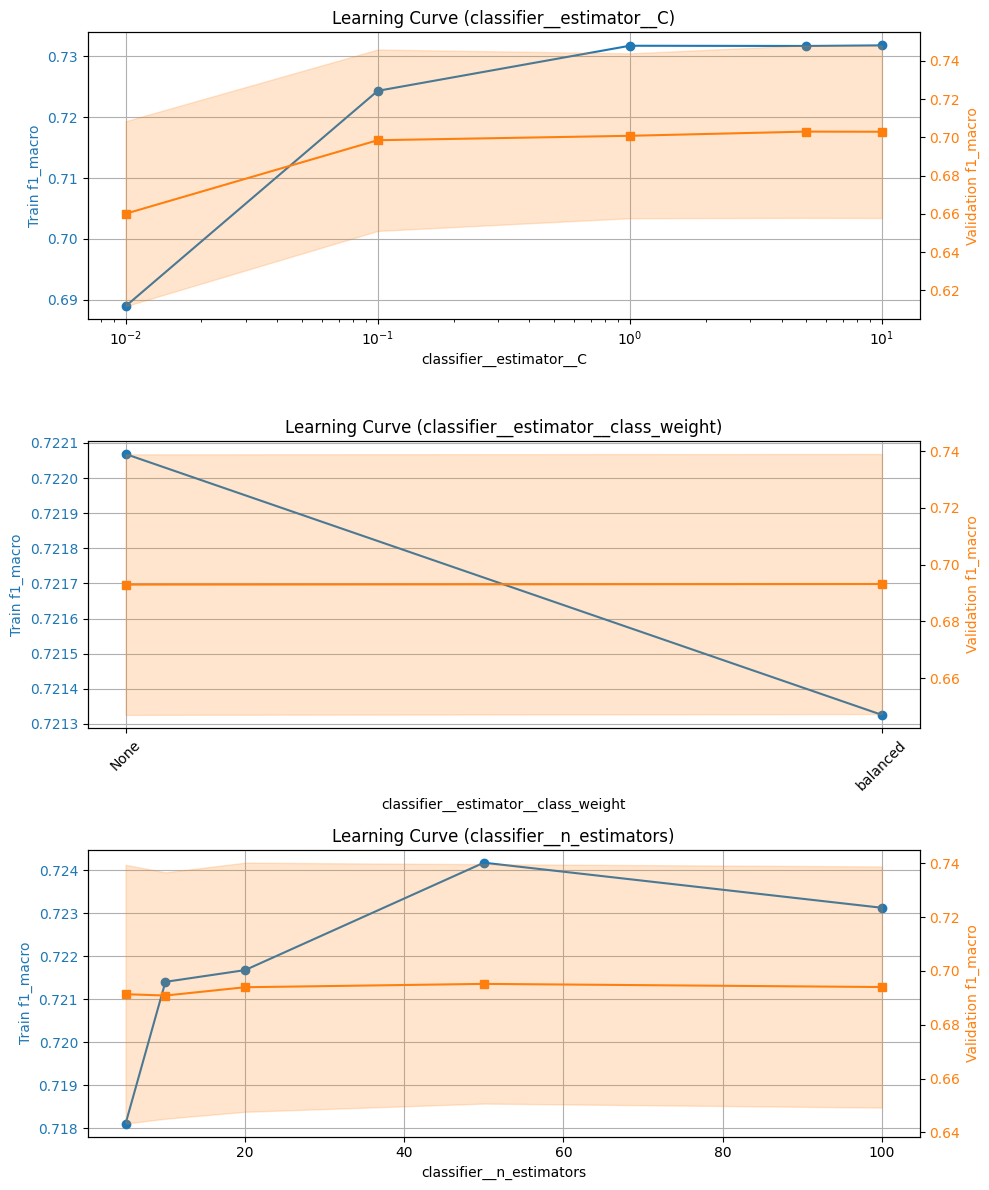

========================= Testing =========================
Confusion matrix:
          Predicted 0  Predicted 1  Predicted 2
Actual 0           79           17            9
Actual 1            5           90           15
Actual 2           17           28           65
Accuracy: 0.72
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77       105
           1       0.67      0.82      0.73       110
           2       0.73      0.59      0.65       110

    accuracy                           0.72       325
   macro avg       0.73      0.72      0.72       325
weighted avg       0.73      0.72      0.72       325



In [112]:
bagged_logistic_regression = train_test_bagged_logistic_regression(X, y)

Bagging logistic regression models doesn't improve its performance.

## Majority vote
Ensembling the bagging model with random forest may improve the classifier.

In [ ]:
def train_voting_ensemble(
    X_train,
    y_train,
    random_state: int = 11,
    n_jobs: int = -1,
    verbose: bool = True
):
    numerical_columns = X_train.select_dtypes(include = "number").columns
    categorical_columns = X_train.select_dtypes(exclude = "number").columns
    
    preprocessor = ColumnTransformer(
        transformers = [
            ("num", StandardScaler(), numerical_columns),
            ("cat", OneHotEncoder(drop = "first"), categorical_columns)
        ]
    )
    
    bagged_logistic_regression = BaggingClassifier(
        estimator = LogisticRegression(max_iter = 1000, n_jobs = n_jobs, random_state = random_state),
        bootstrap = True,
        n_jobs = n_jobs,
        random_state = random_state
    )
    
    random_forest = RandomForestClassifier()
    
    voting_model = VotingClassifier(
        estimators = [
            ("bagged_logistic_regression", bagged_logistic_regression),
            ("random_forest", random_forest)
        ],
        voting = "hard",
        n_jobs = n_jobs
    )
    
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("voting", voting_model)
    ])
    
    params = {}
    params["bagger"] = {
        "n_estimators": [5, 10, 20, 50, 100]
    }
    params["logistic_regression"] = {
        "C": [0.01, 0.1, 1, 5],
        "class_weight": ["balanced", None]
    }
    params["random_forest"] = {
        "n_estimators": [50, 60, 100, 150],
        "max_depth": [3, 5, 10, 20],
        "min_samples_split": [2, 10, 20],
        "min_samples_leaf": [2, 4, 6, 10],
        "max_features": ["sqrt", "log2"],
        "bootstrap": [True, False],
        "class_weight": ["balanced", None]
    }
    
    param_grid = {}

    param_grid |= ({f"voting__bagged_logistic_regression__{param}": options for param, options in params["bagger"].items()})
    param_grid |= {f"voting__bagged_logistic_regression__estimator__{param}": options for param, options in params["logistic_regression"].items()}
    param_grid |= {f"voting__random_forest__{param}": options for param, options in params["random_forest"].items()}
    
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = random_state)
    
    pipeline = RandomizedSearchCV(
        estimator = pipeline,
        param_distributions = param_grid,
        refit = True,
        scoring = "f1_macro",
        cv = cv,
        random_state = random_state,
        n_jobs = n_jobs,
        return_train_score = True
    )
    
    pipeline.fit(X_train, y_train)
    
    if verbose:
        summarize_crossvalidation(pipeline)
        print("Training accuracy:", pipeline.score(X_train, y_train))
        
        #plot_learning_curve(pipeline, list(params.keys()))
    
    return pipeline.best_estimator_

In [90]:
def train_test_voting_ensemble(
    X: pd.DataFrame,
    y: pd.Series,
    test_size: float | None = None,
    train_size: float | None = None,
    random_state: int = 11,
    n_jobs: int = -1,
    verbose: bool = True
):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = test_size, train_size = train_size, random_state = random_state, stratify = y
    )
    
    if verbose:
        print("Training data dimensions:", X_train.shape)
        print("Testing data dimensions:", X_test.shape)
    
    model = train_voting_ensemble(X_train, y_train, random_state, n_jobs, verbose)
    
    accuracy = test_model(model, X_test, y_test)
    
    return model

In [111]:
voting_ensemble = train_test_voting_ensemble(X, y)

Training data dimensions: (975, 26)
Testing data dimensions: (325, 26)
Best Parameters: {'voting__random_forest__n_estimators': 150, 'voting__random_forest__min_samples_split': 20, 'voting__random_forest__min_samples_leaf': 4, 'voting__random_forest__max_features': 'sqrt', 'voting__random_forest__max_depth': 20, 'voting__random_forest__class_weight': None, 'voting__random_forest__bootstrap': False, 'voting__bagged_logistic_regression__n_estimators': 50, 'voting__bagged_logistic_regression__estimator__class_weight': 'balanced', 'voting__bagged_logistic_regression__estimator__C': 1}
Best Score (CV avg): 0.7476923076923077
Training accuracy: 0.8635897435897436
========================= Testing =========================
Confusion matrix:
          Predicted 0  Predicted 1  Predicted 2
Actual 0           91           11            3
Actual 1            9           92            9
Actual 2           19           28           63
Accuracy: 0.7569230769230769
Classification report:
            

The majority vote ensemble outperforms logistic regression but is still not as accurate as random forest.

## Stack
The outputs of the individual models in the ensemble can be used to train a final model which classifies the output of the internal models.

In [109]:
def train_stacked_ensemble(
    X_train,
    y_train,
    random_state: int = 11,
    n_jobs: int = -1,
    verbose: bool = True
):
    numerical_columns = X_train.select_dtypes(include = "number").columns
    categorical_columns = X_train.select_dtypes(exclude = "number").columns
    
    preprocessor = ColumnTransformer(
        transformers = [
            ("num", StandardScaler(), numerical_columns),
            ("cat", OneHotEncoder(drop = "first"), categorical_columns)
        ]
    )
    
    bagged_logistic_regression = BaggingClassifier(
        estimator = LogisticRegression(max_iter = 1000, n_jobs = n_jobs),
        bootstrap = True,
        n_jobs = n_jobs,
        random_state = random_state
    )
    
    random_forest = RandomForestClassifier(random_state = random_state)
    
    stacked_model = StackingClassifier(
        estimators = [
            ("bagged_logistic_regression", bagged_logistic_regression),
            ("random_forest", random_forest)
        ],
        final_estimator = SVC(random_state = random_state),
        cv = 5,
        n_jobs = n_jobs
    )
    
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("stack", stacked_model)
    ])
    
    params = {}
    params["bagger"] = {
        "n_estimators": [5, 10, 20, 50, 100]
    }
    params["logistic_regression"] = {
        "C": [0.01, 0.1, 1, 5, 10, 25, 50, 100],
        "class_weight": ["balanced", None]
    }
    params["random_forest"] = {
        "n_estimators": [50, 60, 100, 150],
        "max_depth": [3, 5, 10, 20],
        "min_samples_split": [2, 10, 20],
        "min_samples_leaf": [2, 4, 6, 10],
        "max_features": ["sqrt", "log2"],
        "bootstrap": [True, False],
        "class_weight": ["balanced", None]
    }
    params["final"] = {
        "C": [0.1, 1, 5]
    }
    
    param_grid = {}

    param_grid |= ({f"stack__bagged_logistic_regression__{param}": options for param, options in params["bagger"].items()})
    param_grid |= {f"stack__bagged_logistic_regression__estimator__{param}": options for param, options in params["logistic_regression"].items()}
    param_grid |= {f"stack__random_forest__{param}": options for param, options in params["random_forest"].items()}
    param_grid |= {f"stack__final_estimator__{param}": options for param, options in params["final"].items()}
    
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = random_state)
    
    pipeline = RandomizedSearchCV(
        estimator = pipeline,
        param_distributions = param_grid,
        refit = True,
        scoring = "f1_macro",
        cv = cv,
        random_state = random_state,
        n_jobs = n_jobs,
        return_train_score = True
    )
    
    pipeline.fit(X_train, y_train)
    
    if verbose:
        summarize_crossvalidation(pipeline)
        print("Training accuracy:", pipeline.score(X_train, y_train))
        
        #plot_learning_curve(pipeline, list(params.keys()))
    
    return pipeline.best_estimator_

In [93]:
def train_test_stacked_ensemble(
    X: pd.DataFrame,
    y: pd.Series,
    test_size: float | None = None,
    train_size: float | None = None,
    random_state: int = 11,
    n_jobs: int = -1,
    verbose: bool = True
):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = test_size, train_size = train_size, random_state = random_state, stratify = y
    )
    
    if verbose:
        print("Training data dimensions:", X_train.shape)
        print("Testing data dimensions:", X_test.shape)
    
    model = train_stacked_ensemble(X_train, y_train, random_state, n_jobs, verbose)
    
    accuracy = test_model(model, X_test, y_test)
    
    return model

In [110]:
stacked_ensemble = train_test_stacked_ensemble(X, y)

Training data dimensions: (975, 26)
Testing data dimensions: (325, 26)
Best Parameters: {'stack__random_forest__n_estimators': 50, 'stack__random_forest__min_samples_split': 2, 'stack__random_forest__min_samples_leaf': 2, 'stack__random_forest__max_features': 'log2', 'stack__random_forest__max_depth': 20, 'stack__random_forest__class_weight': 'balanced', 'stack__random_forest__bootstrap': False, 'stack__final_estimator__C': 1, 'stack__bagged_logistic_regression__n_estimators': 10, 'stack__bagged_logistic_regression__estimator__class_weight': 'balanced', 'stack__bagged_logistic_regression__estimator__C': 50}
Best Score (CV avg): 0.7853314388036899
Training accuracy: 0.9938065654241447
========================= Testing =========================
Confusion matrix:
          Predicted 0  Predicted 1  Predicted 2
Actual 0           87           11            7
Actual 1            4           98            8
Actual 2           13           19           78
Accuracy: 0.8092307692307692
Classifi

While this model outperforms all the others, the improvement (`< 1%`) is negligible.

---
# Final results
Among the two individual classification models, logistic regression attained `74%` accuracy and random forest attained `80%` accuracy. This difference in performance may reflect the limitations that logistic regression has as a linear model in a multiclass setting. The decision boundaries between the classes may not be conducive to logistic regressions approach. Random forest seems to handle the underlying structure of the data better, a result of the more complex architecture of the model which natively supports multiclass classification.

To contextualize the models' performances, the 3 labels are evenly distributed, so a random classifier would be expected to achieve `33%` accuracy. All the models learn important patterns in the data and predict better than a random guess.

Ensembling was used to make the models more robust, and the stacked classifier performed the best at `81%` accuracy. This negligible improvement suggests that the individual models, especially random forest, already captured most of the predictive information in the data. The ensemble models seem to introduce extra complexity without any real benefit in their predictions. Thus, random forest with outliers removed will be used as the final predictor.

The optimal hyperparameters of the model are
```
'classifier__n_estimators': 50,
'classifier__min_samples_split': 20,
'classifier__min_samples_leaf': 2,
'classifier__max_features': 'log2',
'classifier__max_depth': 10,
'classifier__class_weight': None,
'classifier__bootstrap': False
```
trained on the data with outliers removed.

## Model
The stacked model will now be retrained on the entire test set with the optimal hyperparameters

In [100]:

numerical_columns = X_train.select_dtypes(include = "number").columns
categorical_columns = X_train.select_dtypes(exclude = "number").columns

preprocessor = ColumnTransformer(
    transformers = [
        ("cat", OneHotEncoder(handle_unknown = "warn"), categorical_columns)
    ],
    remainder = "passthrough"
)

final_model = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        random_state = 11,
        n_jobs = -1,
        n_estimators = 50,
        min_samples_split = 20,
        min_samples_leaf = 2,
        max_features = "log2",
        max_depth = 10,
        class_weight = None,
        bootstrap = False
    ))
])

final_model.fit(X[data["outlier"] == False], y[data["outlier"] == False])

/Users/joshuatan/Documents/Programming/MachineLearningProject/.venv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='warn'),
                                                  Index(['categorical_feature_1'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(bootstrap=False, max_depth=10,
                                        max_features='log2', min_samples_leaf=2,
                                        min_samples_split=20, n_estimators=50,
                                        n_jobs=-1, random_state=11))])

## Predictions

In [118]:
test_data = pd.read_csv("mldata_0003244705/mldata_0003244705.TEST_FEATURES.csv", index_col = 0)

In [124]:
predictions = final_model.predict(test_data)
np.savetxt("test_predictions.csv", predictions, fmt = "%i")